# Running Peacasso - Python API and UI




## Requirements and Installation

- Step 1: **Access to Weights via HuggingFace**

  Access to the diffusion model weights requires a HuggingFace model account and access token. Please create an account at [huggingface.co](https://huggingface.co/), get an [access token](https://huggingface.co/settings/tokens) and agree to the model terms [here](https://huggingface.co/CompVis/stable-diffusion-v1-4). Next, create a `HF_API_TOKEN` environment variable containing your token. `export HF_API_TOKEN=your_token`. Note that the first time you run peacasso, the weights for the SD model are [cached locally](https://huggingface.co/transformers/v4.0.1/installation.html#caching-models) on your machine. In theory, you can download the weights, and run peacasso by pointing to the folder with the weights.

- Step 2: **Verify Environment - Pythong 3.7+ and CUDA**
  Setup and verify that your python environment is `python 3.7` or higher (preferably, use Conda). Also verify that you have CUDA installed correctly (`torch.cuda.is_available()` is true) and your GPU has about [7GB of VRAM memory](https://stability.ai/blog/stable-diffusion-public-release).

Once requirements are met, run the following command to install the library:

```bash
pip install peacasso
```


In [1]:
!pip install -q peacasso==0.0.11a0

In [ ]:
import os
os.environ['HF_API_TOKEN'] = "your HF Token Here" 

In [2]:
import os
from peacasso.generator import ImageGenerator
from peacasso.datamodel import GeneratorConfig
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# load token from .env variable
token = os.environ.get("HF_API_TOKEN")
gen = ImageGenerator(token=token)

In [3]:
def plot_images(images, title=""):
  plt.figure(figsize=(18,6))
  plt.imshow(images);
  plt.title(title)
  plt.axis('off');

## Prompt Based Generation

Generating images conditioned on text representation. The following code generates 3 images conditioned on the text prompt `"portrait photo of a asia old warrior chief, tribal panther make up, blue on red, side profile, looking away, serious eyes, 50mm portrait photography, hard rim lighting photography--beta"`. 

0it [00:00, ?it/s]

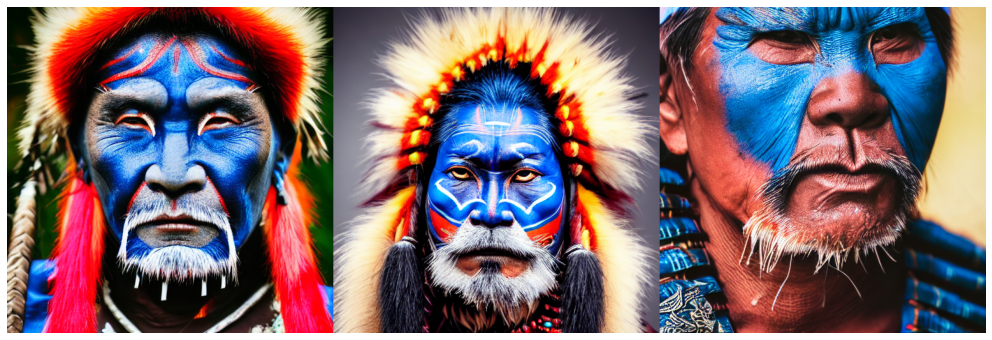

In [6]:
prompt = "portrait photo of a asia old warrior chief, tribal panther make up, blue on red, side profile, looking away, serious eyes, 50mm portrait photography, hard rim lighting photography--beta"
prompt_config = GeneratorConfig(
    prompt=prompt,
    num_images=3,
    width=512,
    height=512,
    guidance_scale=7.5,
    num_inference_steps=20,
    mode="prompt",
    return_intermediates=True,
)

result = gen.generate(prompt_config)
plot_images(np.asarray(np.concatenate(result["images"], axis=1)))

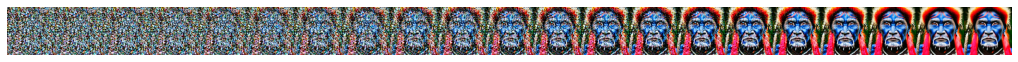

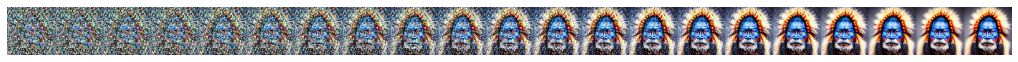

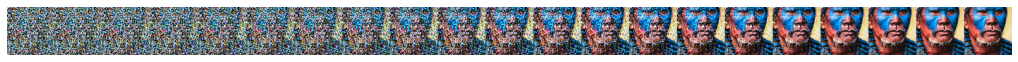

In [7]:
for i in range(prompt_config.num_images):
  plot_images(np.asarray(np.concatenate([x[i] for x in result["intermediates"]], axis=1)))

## Image to Image (Variations)

We can also generate images based on existing images. This is achieved by creating an initial latent representation based on the existing image and then conditioning the generation process on the provided text prompt. We do this by setting the `init_image` field in prompt_config and setting `mode='image'`. Ideally, this should give us variations of the same image.

In the section below, we will take one of the images generated in the previous section (the first image) and generate a new image based on the same prompt. Note that the generated images are variations of the same image.

0it [00:00, ?it/s]

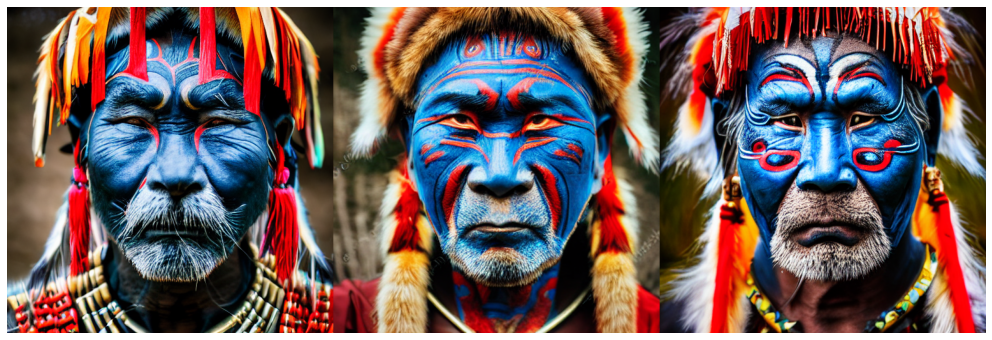

In [9]:
image_prompt_config = GeneratorConfig(
    prompt=prompt,
    num_images=3,
    width=512,
    height=512,
    guidance_scale=7.5,
    num_inference_steps=20,
    mode="image",
    return_intermediates=True,
    init_image = result["images"][0]
)

result = gen.generate(image_prompt_config)
plot_images(np.asarray(np.concatenate(result["images"], axis=1)))

## Run UI in Background Thread

In [ ]:
import threading
import uvicorn

def ui(
    host: str = "127.0.0.1", port: int = 8081, workers: int = 1, reload: bool = True
):
    """
    Launch the peacasso UI.Pass in parameters host, port, workers, and reload to override the default values.
    """
    uvicorn.run(
        "peacasso.web.backend.app:app",
        host=host,
        port=port,
        workers=workers, 
    )

def network_call():
    ui()
threading.Thread(target=network_call).start()

## Note 
Wait a few minutes before you run the cell below. This is to allow the model to load into memory.

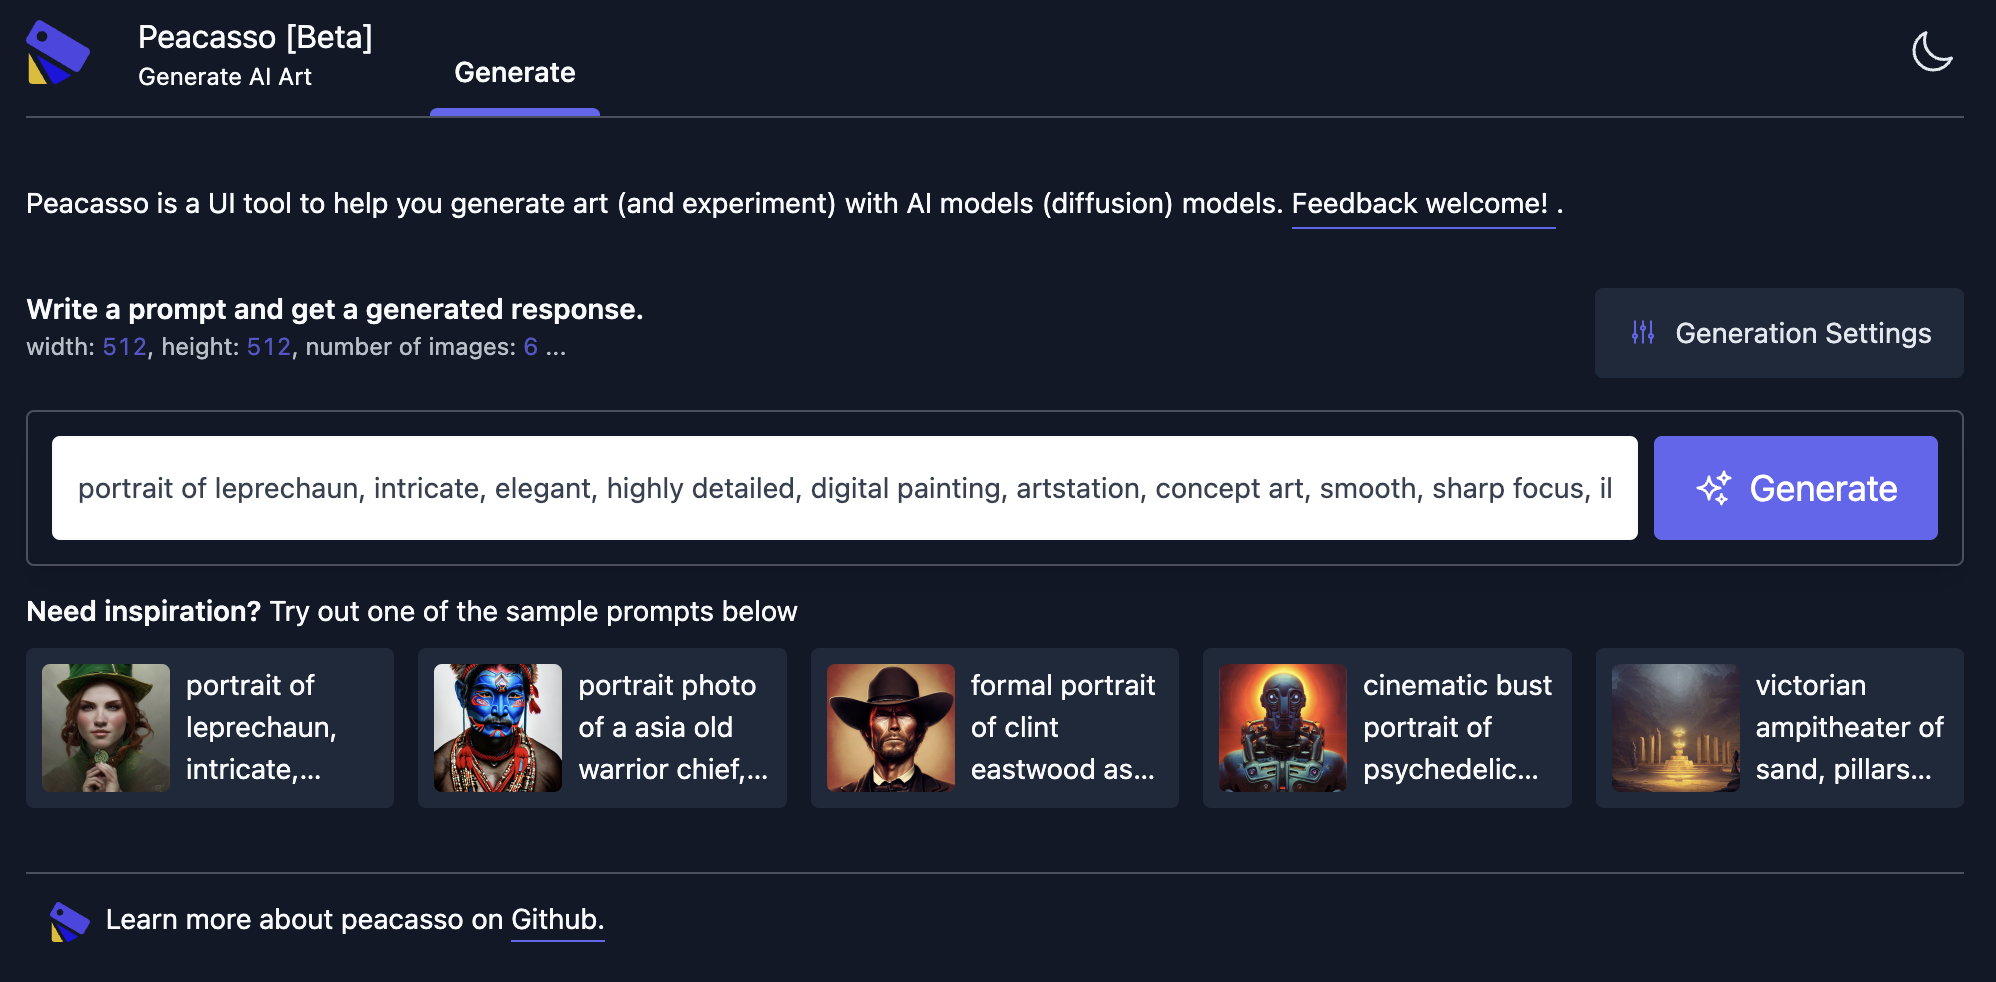You should see the UI. 

In [ ]:
from IPython.display import IFrame
IFrame("http://127.0.0.1:8081", 900,1200)